# ***TALLER: Arbol de clasificacion***

> Por: Caterin Martinez Badillo
>
> Formacion: ADSO
>
> Ficha: 2501259
>
> Instructor: Alvaro Perez Niño
>
> Competencia: Python

## ***Procesamiento de datos***

> Librerias

In [ ]:
# Procesar la informacion
import pandas as pd
import numpy as np

# Visualizacion del arbol
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Regresion Logistica
from sklearn.tree import DecisionTreeClassifier #
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Evaluacion del Modelo
from sklearn.metrics import accuracy_score, confusion_matrix

> Se carga el archivo de excel

In [ ]:
df = pd.read_excel('Agricultura.xlsx')

> Se mira la informacion del dataset por si hay nulos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   N              2200 non-null   int64 
 1   P              2200 non-null   int64 
 2   K              2200 non-null   int64 
 3   temperatura    2200 non-null   int64 
 4   humedad        2200 non-null   int64 
 5   ph             2200 non-null   int64 
 6   precipitacion  2200 non-null   int64 
 7   etiqueta       2200 non-null   object
dtypes: int64(7), object(1)
memory usage: 137.6+ KB


> Se cambia los nombres de las columnas para mayor comodidad.

In [ ]:
df.columns = ['Nitrógeno', 'Fósforo', 'Potasio', 'Temperatura', 'Humedad', 'PH_Suelo', 'Precipitación', 'Etiqueta']

> Mostrar el dataset con los cambios

In [ ]:
df

,Nitrógeno,Fósforo,Potasio,Temperatura,Humedad,PH_Suelo,Precipitación,Etiqueta
0,90,42,43,2087974371,8200274423,6502985292000000,2029355362,arroz
1,85,58,41,2177046169,8031964408,7038096361,2266555374,arroz
2,60,55,44,2300445915,823207629,7840207144,2639642476,arroz
3,74,35,40,2649109635,8015836264,6980400905,2428640342,arroz
4,78,42,42,2013017482,8160487287,7628472891,2627173405,arroz
...,...,...,...,...,...,...,...,...
2195,107,34,32,2677463708,664132686,678006386,1777745075,cafe
2196,99,15,27,2741711238,5663636248,6086922359,12792461000000000,cafe
2197,118,33,30,2413179691,6722512329,6362607851,17332283859999900,cafe
2198,117,32,34,262724184,5212739421,6758792552,1271752928,cafe


## ***Visualización de datos***

> Se visualizan los datos organizados por la Etiqueta

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7c68691e52d0> (for post_execute):


KeyboardInterrupt: ignored

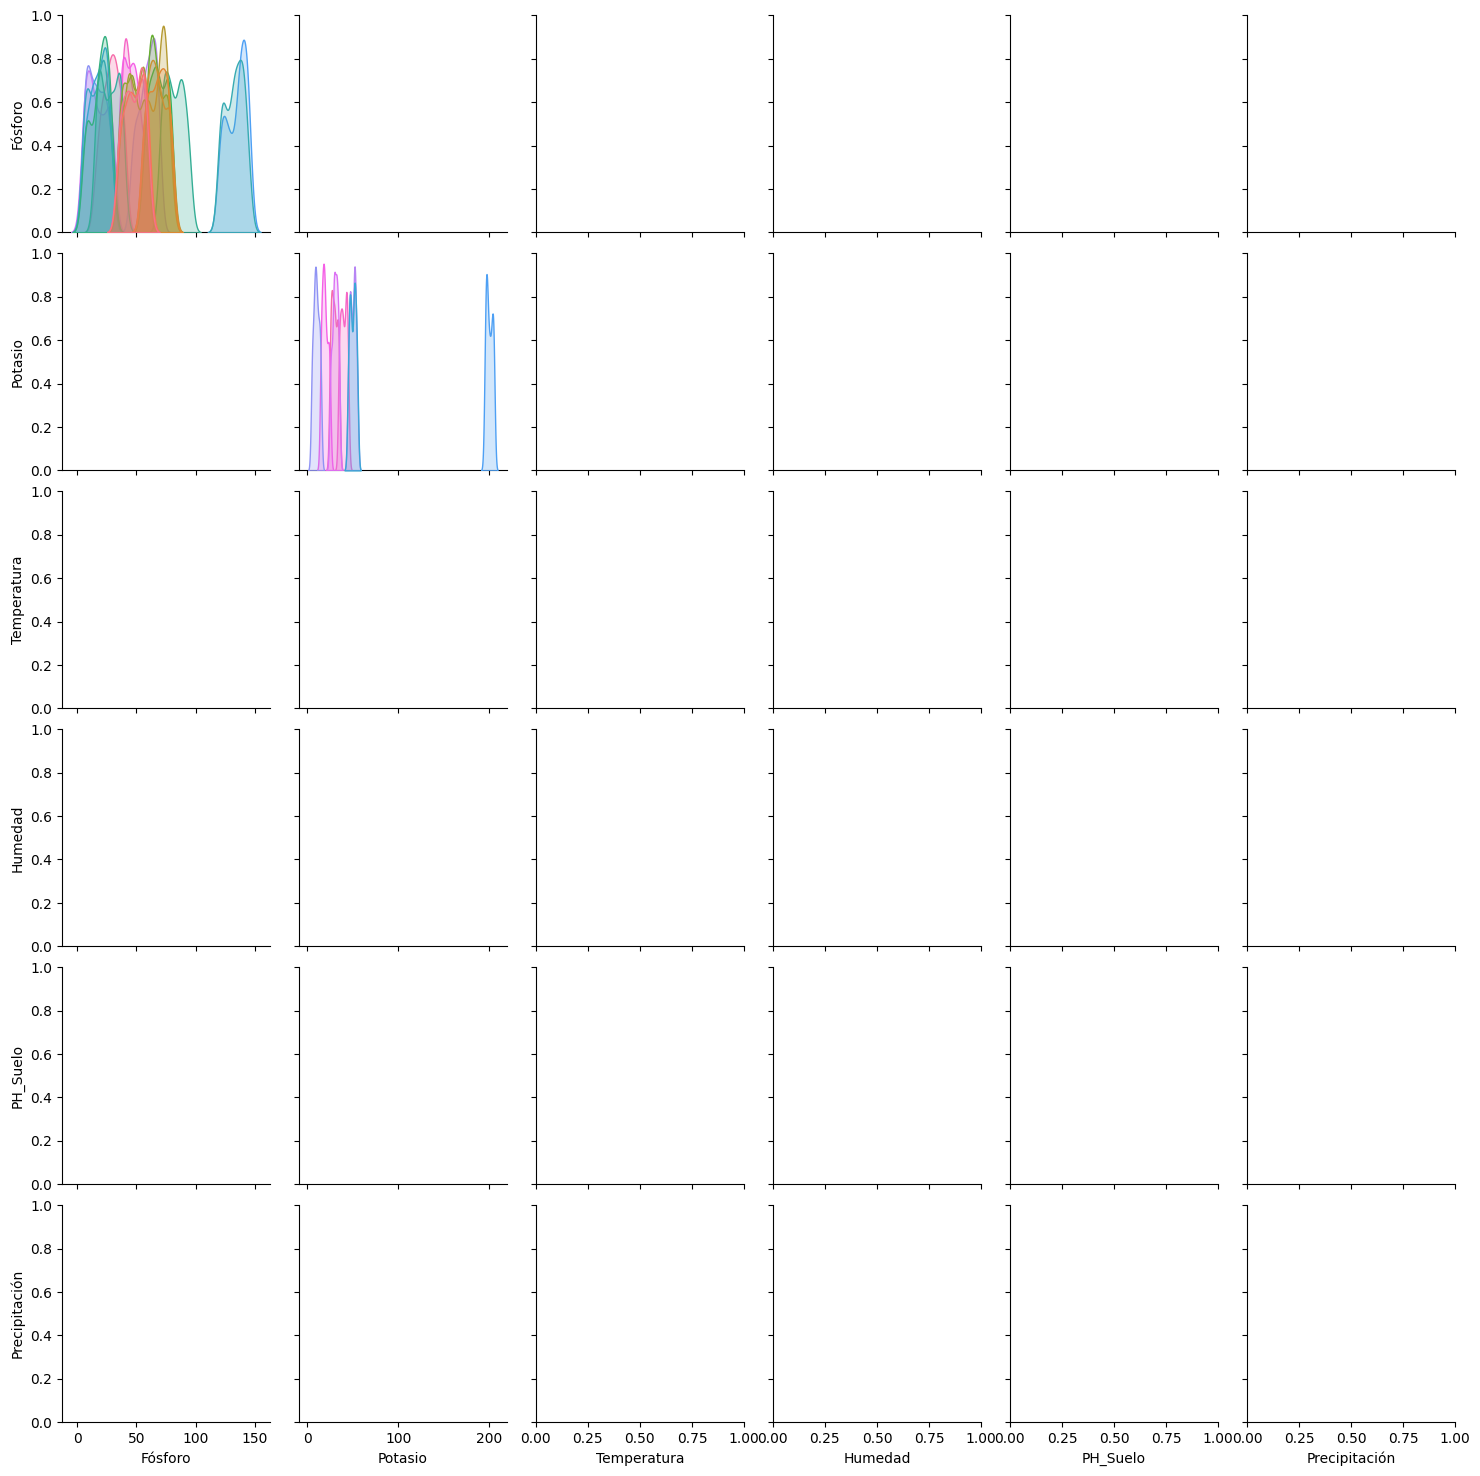

In [ ]:
sns.pairplot(df.iloc[:,1:],hue='Etiqueta')

## ***Division de los datos***

> Se mezclan los datos de dataset

In [ ]:
df = shuffle(df, random_state=1)

> Se seleccionan los datos relavantes para la regresion.

In [ ]:
variables = ['Nitrógeno', 'Fósforo', 'Potasio', 'Temperatura', 'Humedad', 'PH_Suelo', 'Precipitación']

X = df[variables]
y = df['Etiqueta']

> Dividir el conjunto de datos en entrenamiento y prueba.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> Escalar caracteristicas

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## ***Cronstrucción y aprendizaje del modelo de clasificación***

> Crear el modelo de clasificación

In [ ]:
model = DecisionTreeClassifier(random_state=10)

> Entrenar el modelo

In [ ]:
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=10)

> Realiza prediccion con el conjunto de prueba.

In [ ]:
y_pred = model.predict(X_test_scaled)

## ***Evaluación de modelo de machine learning***

> Calcular la predicción del modelo

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Precisión del modelo: %.2f' % accuracy)

Precisión del modelo: 0.93


## ***Visualizacion del Arbol de Clasificación***

> Se genera el arbol de clasificación del dataset

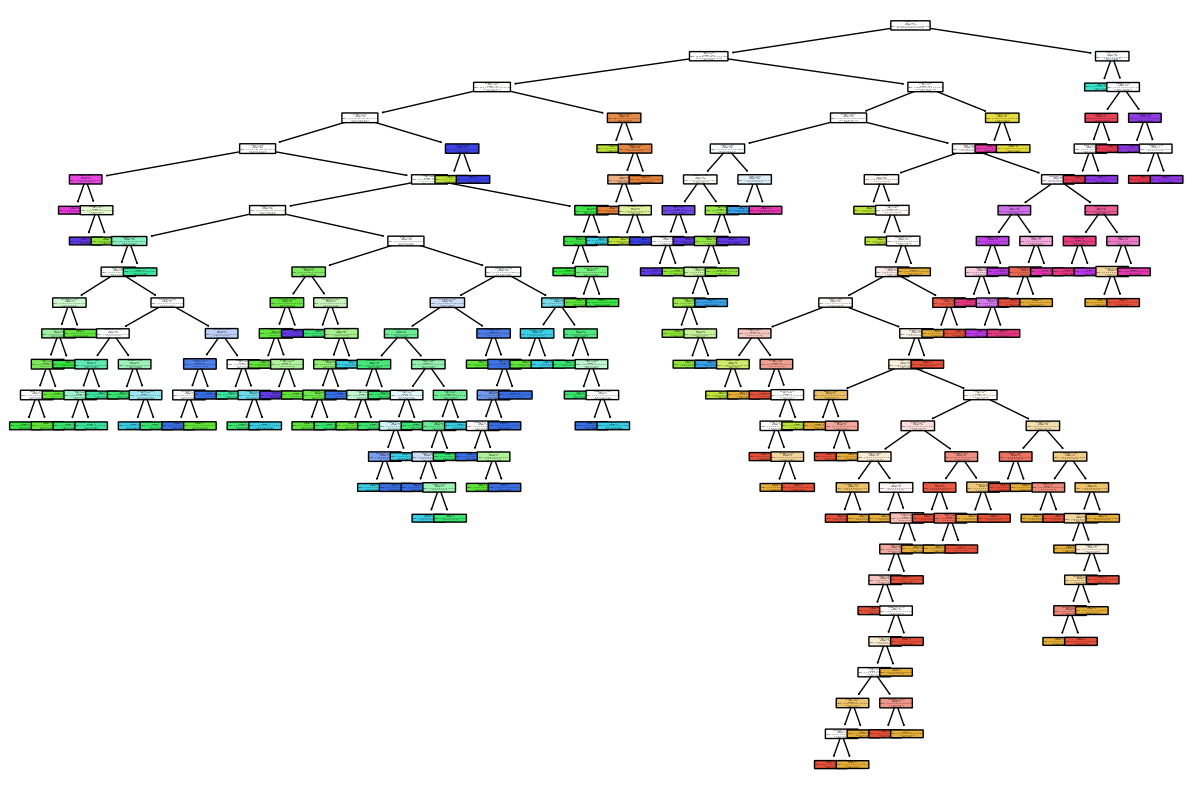

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=df.columns[:-1], class_names=model.classes_, filled=True, rounded=True)
plt.show()

## ***Prediccion Futura***

> Valores Futuros

In [ ]:
Nitrógeno = 13
Fósforo = 5
Potasio = 8
Temperatura = 2385340379
Humedad = 9010522549
PH_Suelo = 7474710503
Precipitación = 103923226

new_samples = np.array([[Nitrógeno, Fósforo, Potasio, Temperatura, Humedad, PH_Suelo, Precipitación]])

> Escala las características de las nuevas muestras utilizando el escalador entrenado

In [ ]:
X_new_scaled = scaler.transform(new_samples)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


> Realiza predicciones en las nuevas muestras utilizando el modelo de árbol de decisión

In [ ]:
y_pred_new = model.predict(X_new_scaled)

> y_pred_new contiene las etiquetas de clase predichas para las nuevas muestras

In [ ]:
print(f"La Clasificacion de Iris es: {y_pred_new[0]}")

La Clasificacion de Iris es: naranja


## ***Modelo Final***

> Se guarda ya el modelo entrenado y ajustado

In [ ]:
import pickle

with open('modelo_regresion.pkl', 'wb') as file:
    pickle.dump(model, file)